In [ ]:
from drawSequences import drawVPitch, drawSequences, getAxes, plotXY
from ast import literal_eval
import pandas as pd
import numpy as np
from dtaidistance import dtw_ndim
from numpy import inf
from scipy.spatial.distance import squareform
from IPython.display import Image 

In [ ]:
#Import data

converter = {"x": literal_eval,
             "y": literal_eval,
             #"assist": literal_eval,
             "event_id": literal_eval,
             "id": literal_eval,
             "min": literal_eval,
             "outcome": literal_eval,
             #"player_id": literal_eval,
             "sec": literal_eval,
             "time": literal_eval,
             #"timestamp": literal_eval,
             "type_id": literal_eval
             }

PATH = "DATA/sequences.csv"

seq = pd.read_csv(PATH, converters=converter, index_col = 0, nrows = 10000)

In [ ]:
#Create DTW function 

def dtw2(test_seq, myblock):
    seq_array = []
    for index, seq in test_seq.iterrows():
        s1 = np.column_stack((seq['x'],seq['y']))
        seq_array.append(s1)
    
    ds = dtw_ndim.distance_matrix(seq_array, parallel=True, show_progress = True, block = myblock)
    ds[ds == inf] = 0
    ds = ds + ds.transpose()
    return ds

In [ ]:
#Blocking distance matrix creation due to memory contraints

blocks = [((0,5000),(0,5000)), 
          ((0,5000),(5000,10000)),
          ((0,5000),(10000,15000)),
          ((0,5000),(15000,20000)),
          ((0,5000),(20000,24536)),
          ((5000,10000),(5000,10000)),
          ((5000,10000),(10000,15000)),
          ((5000,10000),(15000,20000)),
          ((5000,10000),(20000,24536)),
          ((10000,15000),(10000,15000)),
          ((10000,15000),(15000,20000)),
          ((10000,15000),(20000,24536)),
          ((15000,20000),(15000,20000)),
          ((15000,20000),(20000,24536)),
          ((20000,24536),(20000,24536))]

names = ["x1y1", "x1y2", "x1y3", "x1y4", "x1y5",
         "x2y2", "x2y3", "x2y4", "x2y5",
         "x3y3", "x3y4", "x3y5",
         "x4y4", "x4y5",
         "x5y5"]

for block,name in zip(blocks, names):
    dtw2_dm = dtw2(seq, block)
    vm = squareform(dtw2_dm, force = 'to_vector')
    np.save(name, vm)

In [ ]:
#Reform whole distance matrix

FORMAT = '.npy'
paths = [name + FORMAT for name in names]

final = squareform(np.load(paths[1]))

for path in paths[1:]:
    final = final + squareform(np.load(path))


In [ ]:
#Create clusters using the pre-computed dm 

cluster = DBSCAN(metric='precomputed', min_samples = 2, eps = 15).fit_predict(final)

seq['cluster'] = cluster

In [ ]:
#Select clusters to plot

draw_sequences(seq[seq['cluster'] ==9].head(3), save ="plot1.png")
draw_sequences(seq[seq['cluster'] ==13].head(3), save ="plot2.png")
draw_sequences(seq[seq['cluster'] ==24].head(4), save ="plot3.png")

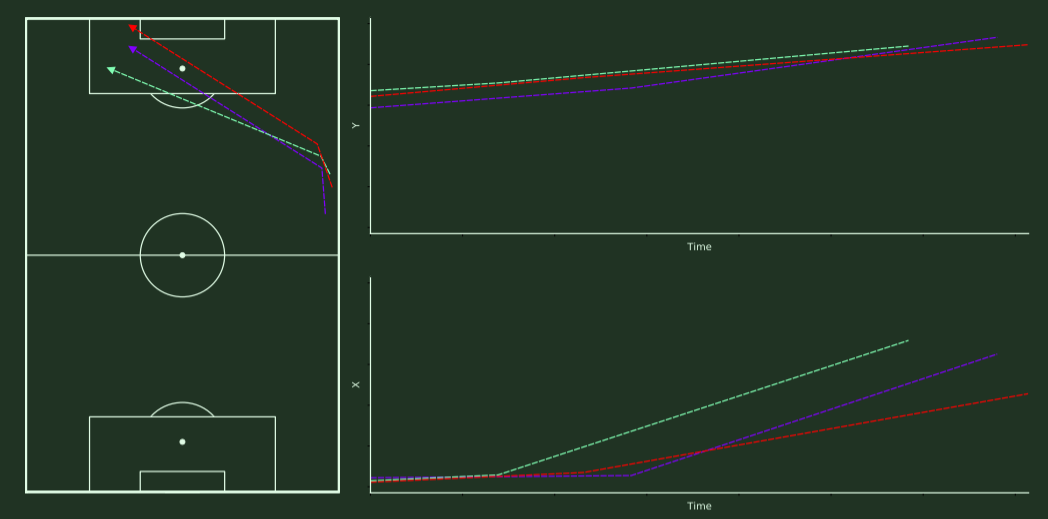

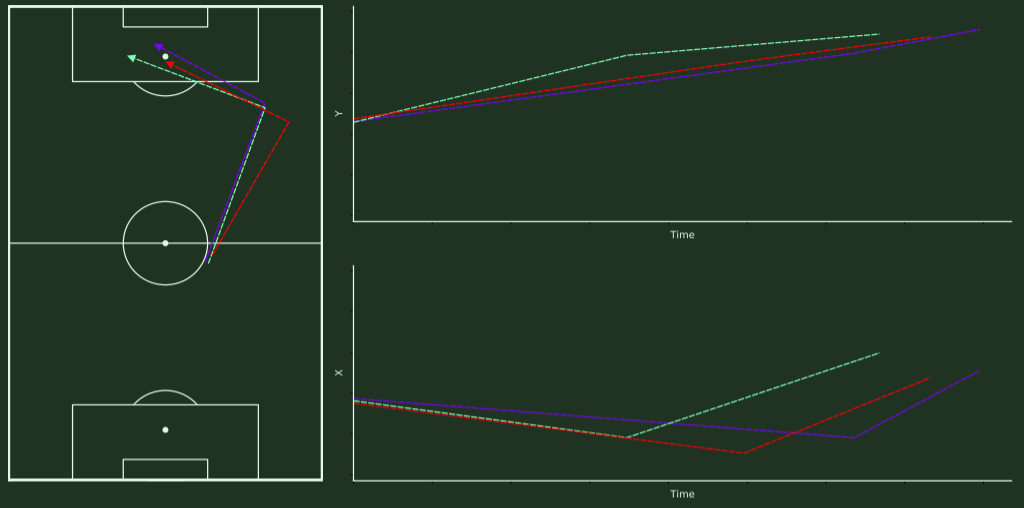

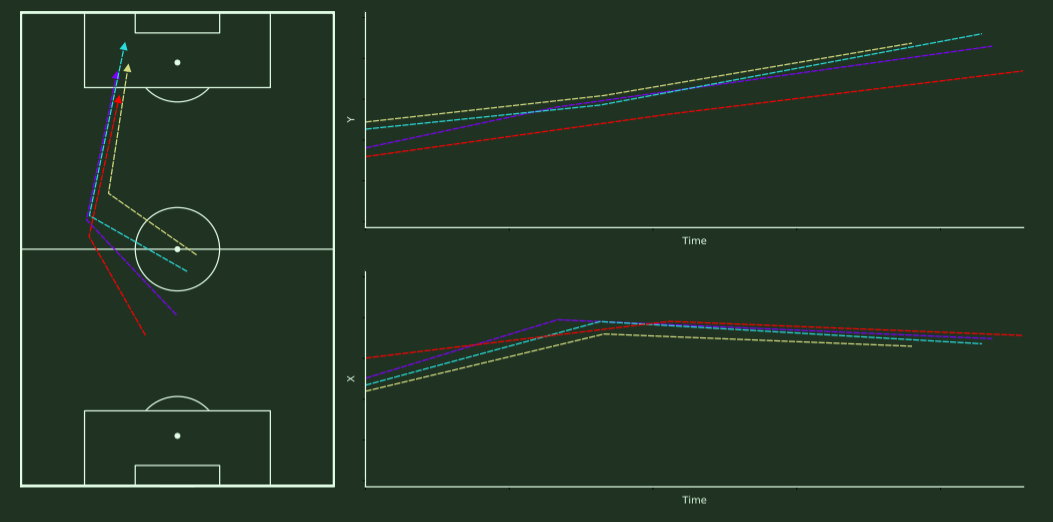

In [6]:
plot1 = Image(filename='plot1.png')
plot2 = Image(filename='plot2.png')
plot3 = Image(filename='plot3.png')

display(plot1,plot2,plot3)